# Estatísticas dos parâmetros de um modelo

1. Faça uma função que receba como entrada uma rede neural e retorne um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
    * O maior e menor valor do parâmetro;
    * O maior e menor valor do gradiente do parâmetro;
2. Faça uma função que receba o dicionário de 1 e retorne o menor e maior valor dentre todos os parâmetros e todos os gradientes (4 valores no total);
2. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**
    

Exemplo

In [2]:
import torch
from torch import nn
from torchvision import models

# Imagem aleatória para ilustração
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

Exemplo

In [3]:
def max_grad(model):
    """Máximo valor de gradiente de cada parâmetro."""

    stats = {}
    # model.named_parameters() retorna os nomes e respectivos parâmetros do
    # modelo
    for param_name, param in model.named_parameters():
        grad = param.grad
        g_max = grad.max()
        stats[param_name] = {'g_max':g_max.item()}

    return stats

# Aplica o modelo
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

max_grad(model)

{'conv1.weight': {'g_max': 0.0005236066645011306},
 'bn1.weight': {'g_max': 0.001010195934213698},
 'bn1.bias': {'g_max': 0.0002801873197313398},
 'layer1.0.conv1.weight': {'g_max': 0.00020345485245343298},
 'layer1.0.bn1.weight': {'g_max': 0.00033277072361670434},
 'layer1.0.bn1.bias': {'g_max': 0.0002245679497718811},
 'layer1.0.conv2.weight': {'g_max': 0.00014124505105428398},
 'layer1.0.bn2.weight': {'g_max': 0.0003498643054626882},
 'layer1.0.bn2.bias': {'g_max': 0.00017340527847409248},
 'layer1.1.conv1.weight': {'g_max': 0.0001015970265143551},
 'layer1.1.bn1.weight': {'g_max': 0.00022922997595742345},
 'layer1.1.bn1.bias': {'g_max': 0.0001417686726199463},
 'layer1.1.conv2.weight': {'g_max': 0.00012050654186168686},
 'layer1.1.bn2.weight': {'g_max': 0.0002052952186204493},
 'layer1.1.bn2.bias': {'g_max': 0.00013652486086357385},
 'layer2.0.conv1.weight': {'g_max': 0.00018517613352742046},
 'layer2.0.bn1.weight': {'g_max': 0.0005470181349664927},
 'layer2.0.bn1.bias': {'g_max': 

# Estatísticas dos parâmetros de um modelo

1. Faça uma função que receba como entrada uma rede neural e retorne um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
    * O maior e menor valor do parâmetro;
    * O maior e menor valor do gradiente do parâmetro;
2. Faça uma função que receba o dicionário de 1 e retorne o menor e maior valor dentre todos os parâmetros e todos os gradientes (4 valores no total);
2. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**
    

### Resolução 

**1.** Função que recebe como entrada uma rede neural e retorna um dicionário contendo como chave o nome do parametro do modelo e o maior e menor valor dos parâmetros, bem como dos gradientes dos parêmetros.

In [4]:
import torch
from torch import nn
from torchvision import models
import matplotlib.pyplot as plt
import random
import numpy as np

In [5]:
seed = 42
torch.manual_seed(seed)
#np.random.seed(seed)

# Criação de um modelo e cálculo dos gradientes como no notebook original
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

In [6]:
def get_model_stats(model):
    """Retorna estatísticas dos parâmetros de um modelo neural.
    
    Para cada parâmetro, retorna o maior e menor valor do parâmetro
    e o maior e menor valor do gradiente do parâmetro.
    """
    stats = {}
    for param_name, param in model.named_parameters():
        # Valores do parâmetro
        param_max = param.max().item()
        param_min = param.min().item()
        
        # Valores do gradiente
        if param.grad is not None:
            grad_max = param.grad.max().item()
            grad_min = param.grad.min().item()
        else:
            grad_max = None
            grad_min = None
        
        stats[param_name] = {
            'param_max': param_max,
            'param_min': param_min,
            'grad_max': grad_max,
            'grad_min': grad_min
        }
    
    return stats

In [7]:
# Passa a imagem pelo modelo para calcular os scores
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

# Obtém as estatísticas dos parâmetros
stats = get_model_stats(model)

# Exibe as estatísticas
# for param, stat in stats.items():
#     print(f"{param}: {stat}")
# Exibe as estatísticas organizadas por linhas
# for param, stat in stats.items():
#     print(f"{param}:")
#     print(f"  param_max: {stat['param_max']}")
#     print(f"  param_min: {stat['param_min']}")
#     print(f"  grad_max: {stat['grad_max']}")
#     print(f"  grad_min: {stat['grad_min']}")
#     print()  # Adiciona uma linha em branco entre cada conjunto de estatísticas

**2.** Função que recebe o dicionário e retorna o valor máximo e mínimo dos parâmetros e gradientes dos parâmetros

In [8]:
def get_overall_stats(stats):
    """Retorna o menor e maior valor dentre todos os parâmetros e gradientes.

    Args:
        stats (dict): Dicionário com estatísticas dos parâmetros e gradientes.

    Returns:
        dict: Dicionário com os menores e maiores valores.
    """
    # Inicializa variáveis para armazenar os valores mínimos e máximos
    overall_param_min = float('inf')
    overall_param_max = float('-inf')
    overall_grad_min = float('inf')
    overall_grad_max = float('-inf')
    
    for _,values in stats.items():
        # Atualiza os valores mínimos e máximos dos parâmetros
        overall_param_min = min(overall_param_min, values['param_min'])
        overall_param_max = max(overall_param_max, values['param_max'])
        
        # Atualiza os valores mínimos e máximos dos gradientes, se disponíveis
        if values['grad_min'] is not None:
            overall_grad_min = min(overall_grad_min, values['grad_min'])
        if values['grad_max'] is not None:
            overall_grad_max = max(overall_grad_max, values['grad_max'])
    
    return overall_param_min, overall_param_max, overall_grad_min, overall_grad_max
    
    
def get_four_stats(model):
    stats=get_model_stats(model)
    return get_overall_stats(stats)

### Análise das imagens aleatórias geradas.

In [9]:
#  overall_statseed = 42
# torch.manual_seed(seed)
# #np.random.seed(seed)

# # Função para criar e plotar um tensor aleatório
# def plot_random_tensor(batch_size, channels, height, width):
#     # Cria um tensor aleatório
#     x = torch.rand(batch_size, channels, height, width)
    
#     # Converte o tensor para um formato que o Matplotlib entende (numpy array)
#     x_np = x.permute(0, 2, 3, 1).cpu().numpy()
    
#     # Plota as imagens
#     _, axes = plt.subplots(1, batch_size, figsize=(15, 15))
#     for i, ax in enumerate(axes):
#         ax.imshow(x_np[i])
#         ax.axis('off')
#     plt.show()

# # Configurações
# batch_size = 4  # Número de imagens para gerar e plotar
# channels = 3  # Número de canais (3 para imagens RGB)
# height = 8  # Altura da imagem
# width = 8  # Largura da imagem

# # Plotar as imagens
# #plot_random_tensor(batch_size, channels, height, width)



**3.** 

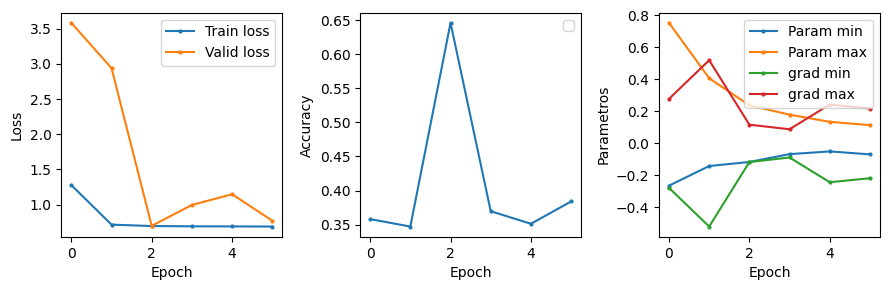

In [11]:
import train

params = {
    #'bs':64,
    'bs':8,
    'num_epochs':6,
    'lr':0.01,
    'weight_decay':1e-2,
    'resize_size':16,  # Tamanho das imagens de treinamento
    'seed':0,
    'overall_stats':get_four_stats
}
model = models.resnet18()
# Modifica a última camada do modelo para classificar em 2 classes
model.fc = nn.Linear(model.fc.in_features, 2)
ds_train, ds_valid, logger = train.train(model, **params)
# Cada época demora em torno de 6.1 segundos em uma RTX3080 Ti